In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset.csv')

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# 3.1.1

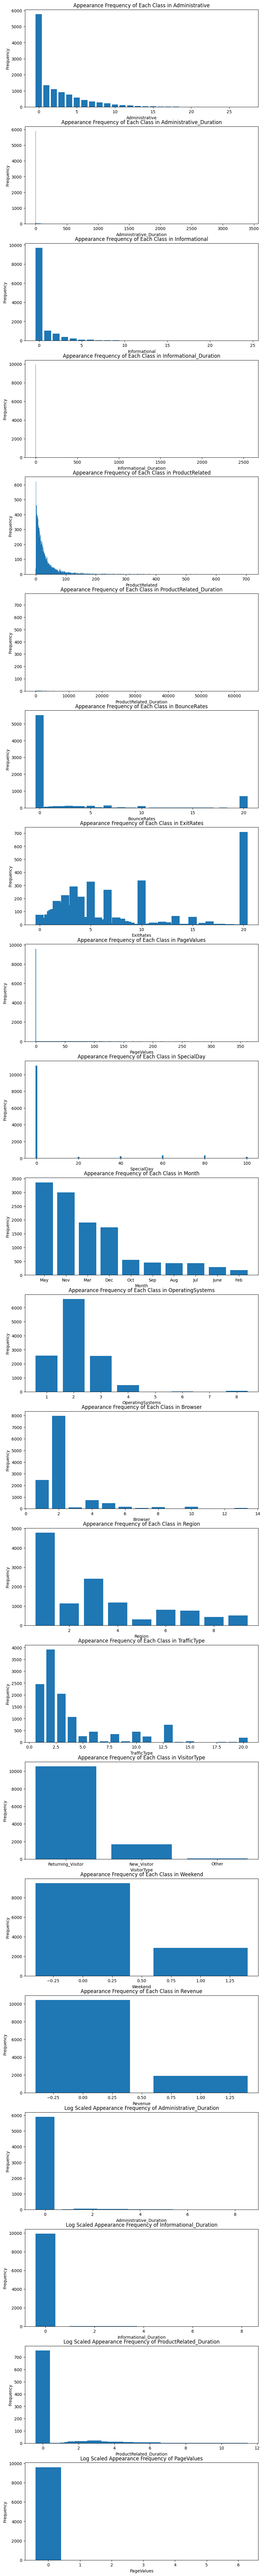

In [2]:
import matplotlib.pyplot as plt

columns = df.columns
num_cols = len(columns) + 4
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5 * num_cols))

for i, col in enumerate(columns):
    class_counts = df[col].value_counts()
    scale_factor = 1
    if col in ['BounceRates', 'ExitRates', 'SpecialDay']:
        scale_factor = 100
    axes[i].bar(class_counts.index * scale_factor, class_counts.values)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Appearance Frequency of Each Class in {col}')

log_scaled_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'PageValues']
for i, duration_col in enumerate(log_scaled_columns):
    class_counts = df[duration_col].value_counts()
    axes[len(columns) + i].bar(np.log1p(class_counts.index), class_counts.values)
    axes[len(columns) + i].set_xlabel(duration_col)
    axes[len(columns) + i].set_ylabel('Frequency')
    axes[len(columns) + i].set_title(f'Log Scaled Appearance Frequency of {duration_col}')

plt.show()

# 3.1.2

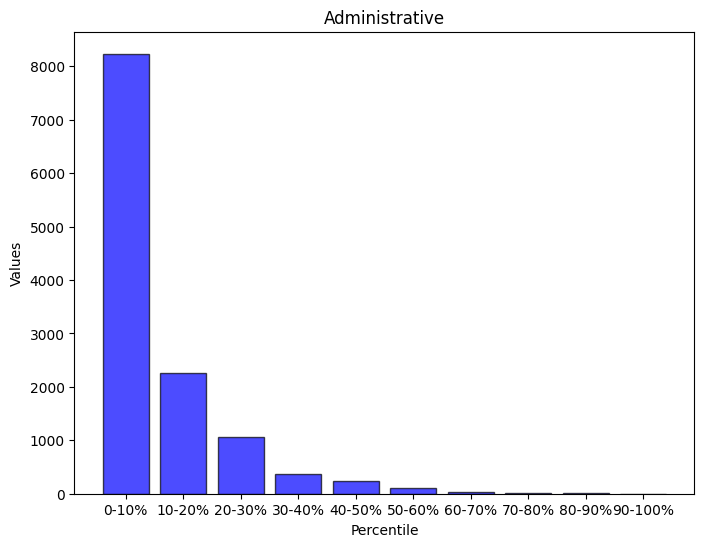

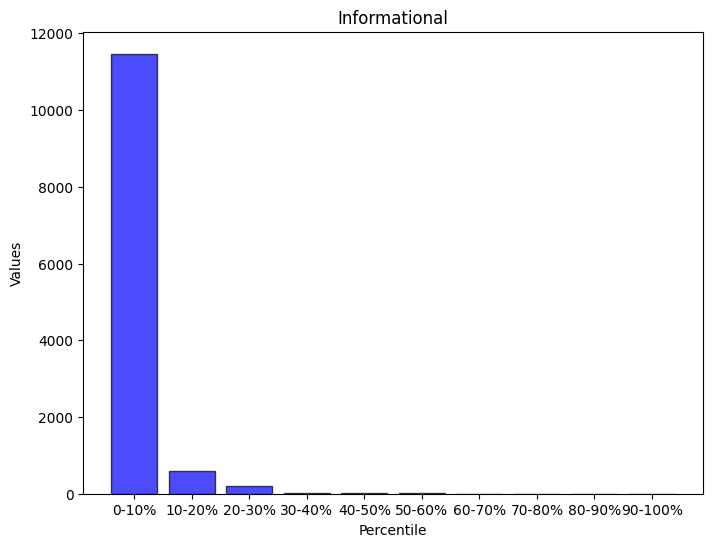

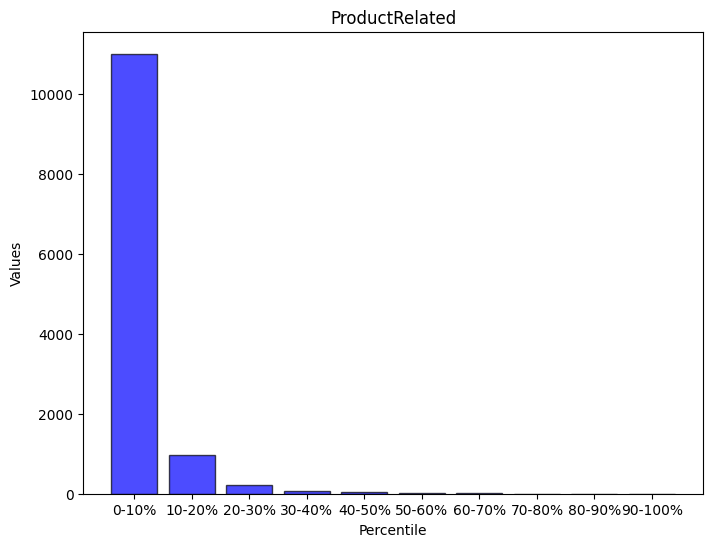

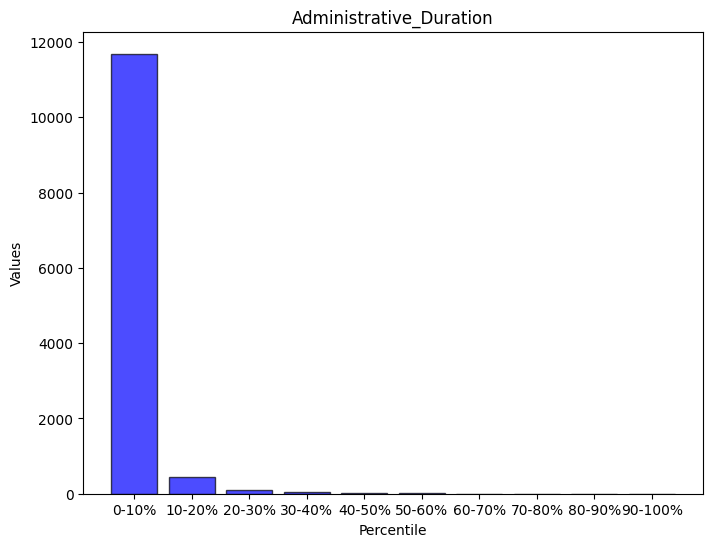

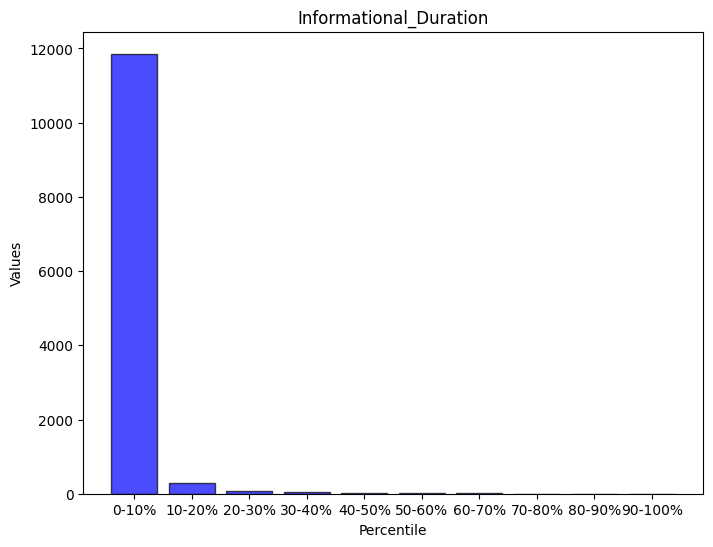

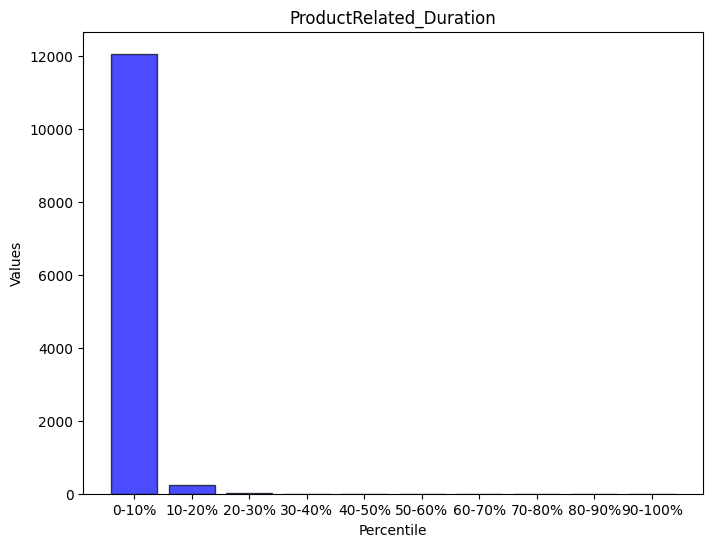

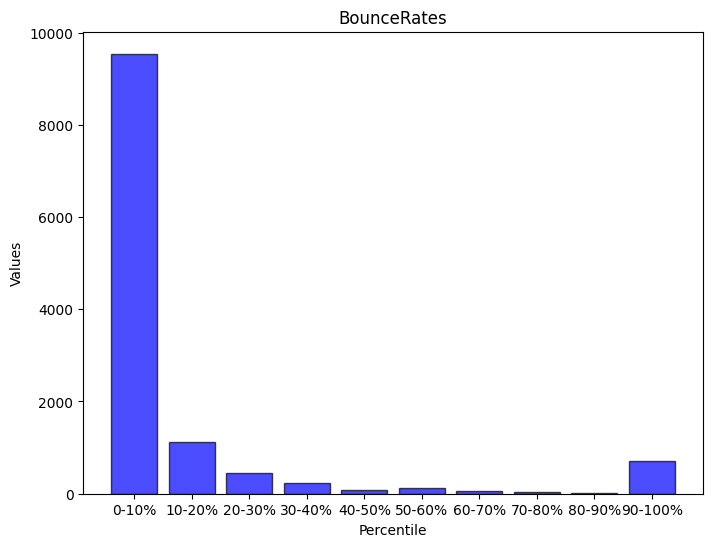

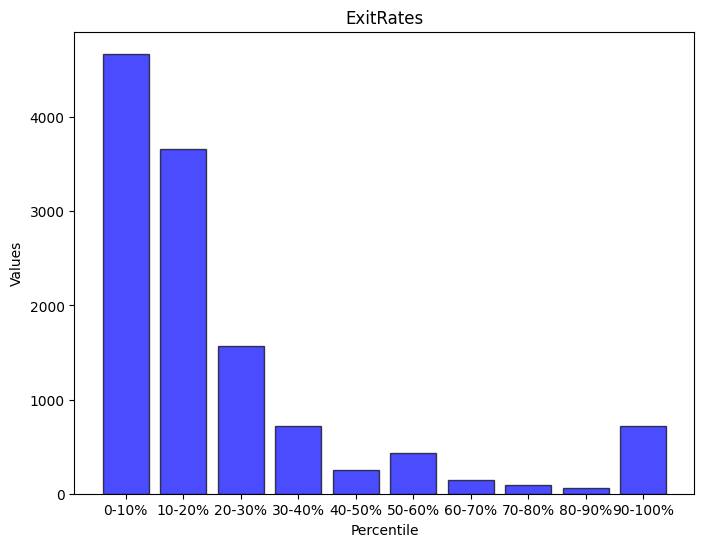

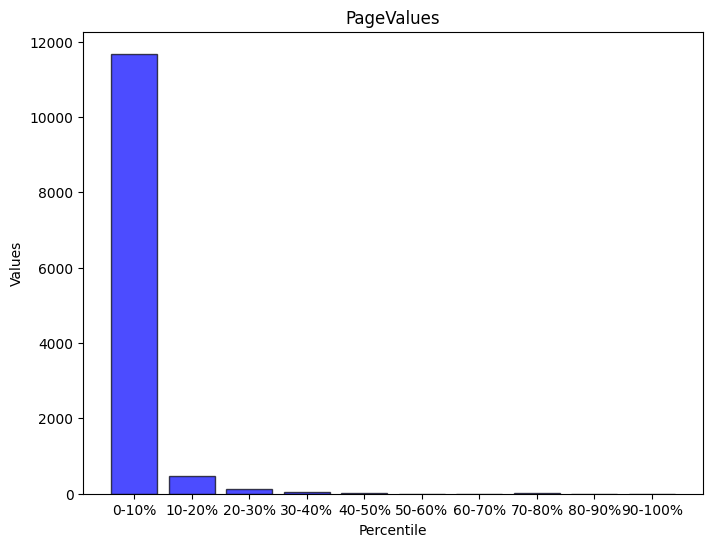

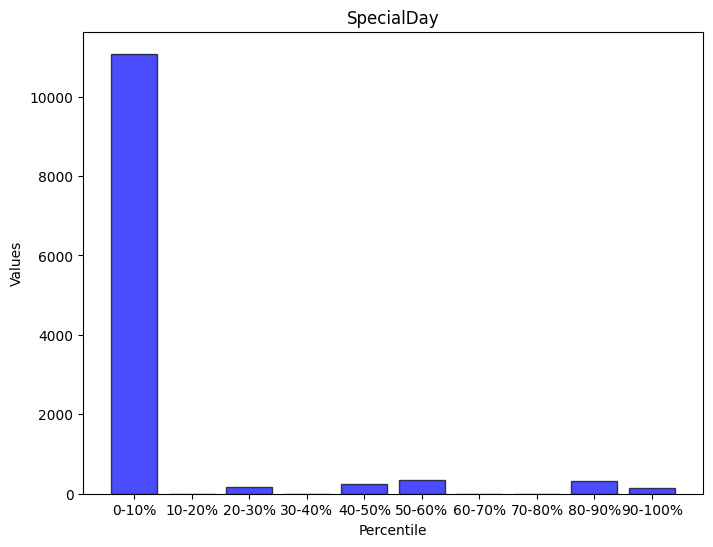

In [3]:
import matplotlib.pyplot as plt

numeric_columns = ['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

for column in numeric_columns:
    values = df[column].values
    min_value = np.min(values)
    max_value = np.max(values)
    
    percentiles = np.linspace(min_value, max_value, 11)
    
    count_per_percentile = np.histogram(values, bins=percentiles)[0]
    
    plt.figure(figsize=(8, 6))
    plt.bar(np.arange(0, 100, 10), count_per_percentile, width=8, alpha=0.7, color='b', edgecolor='black')
    
    plt.title(f'{column}')
    plt.xlabel('Percentile')
    plt.ylabel('Values')
    plt.xticks(np.arange(0, 100, 10), [f'{i}-{i+10}%' for i in range(0, 100, 10)])
    plt.show()

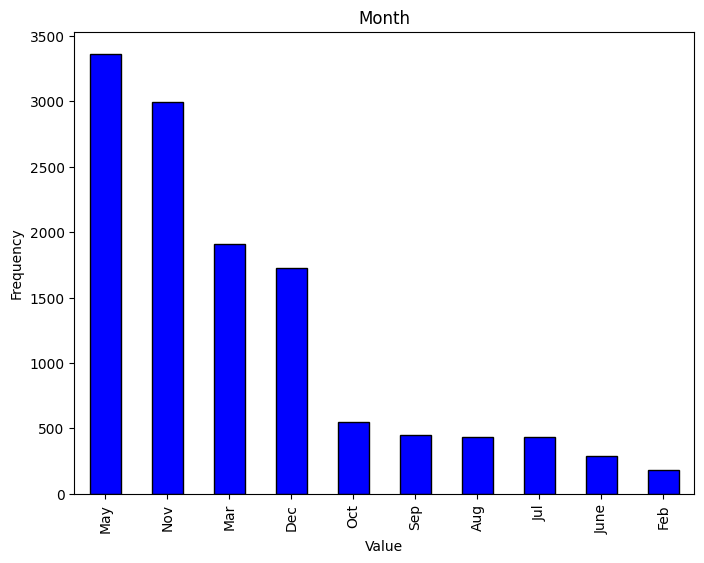

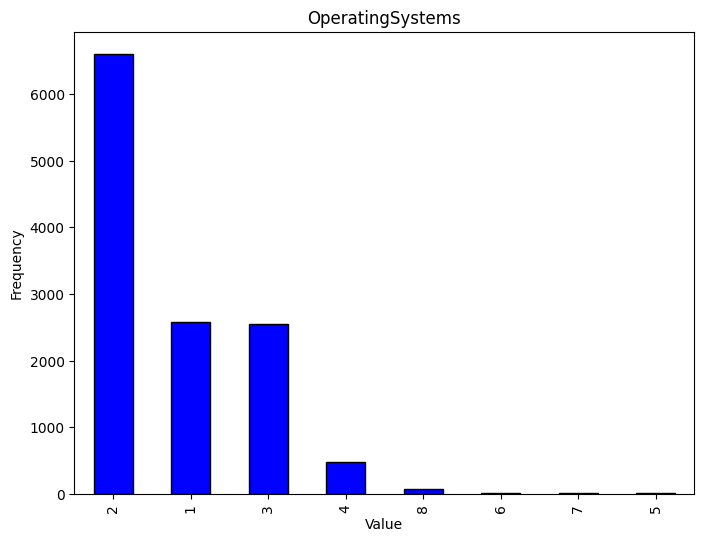

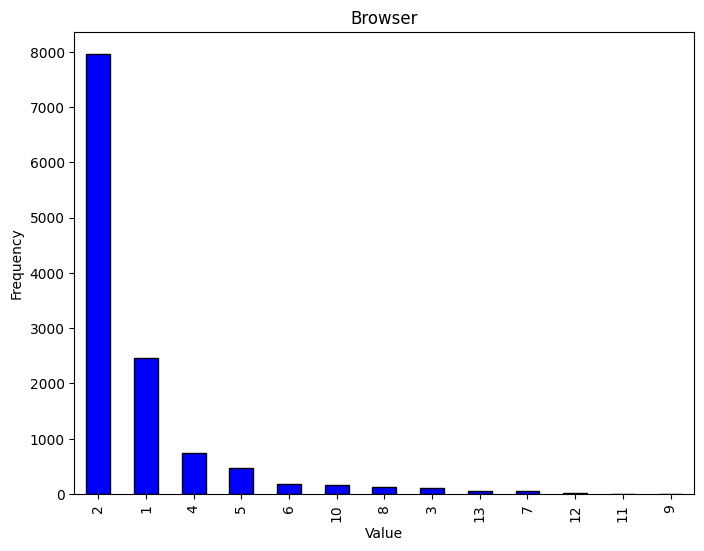

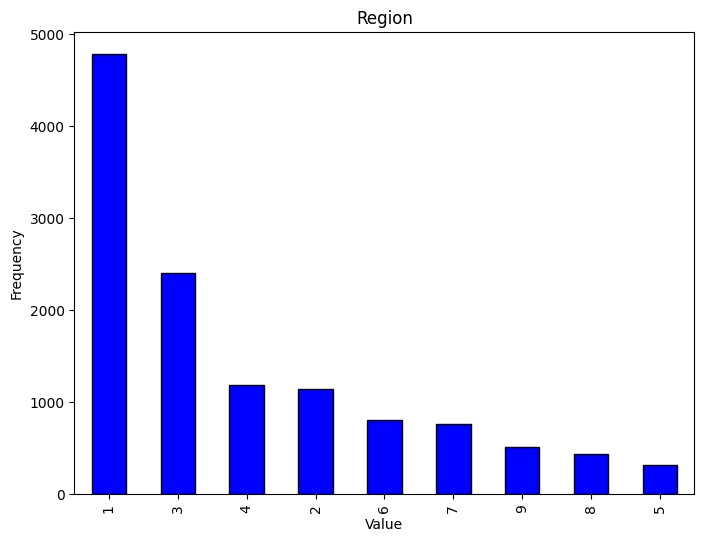

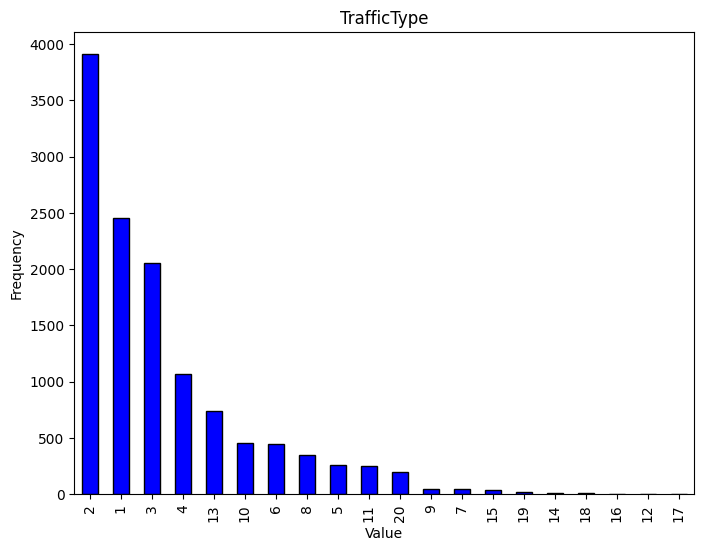

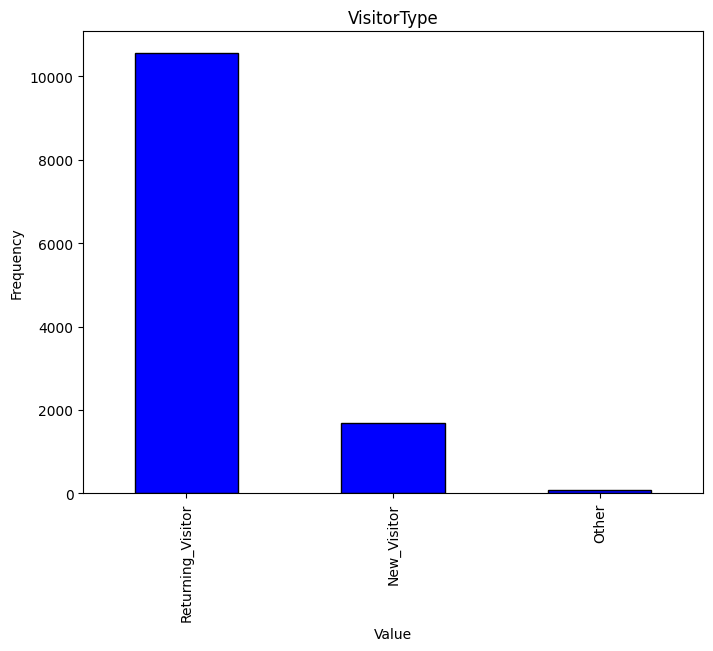

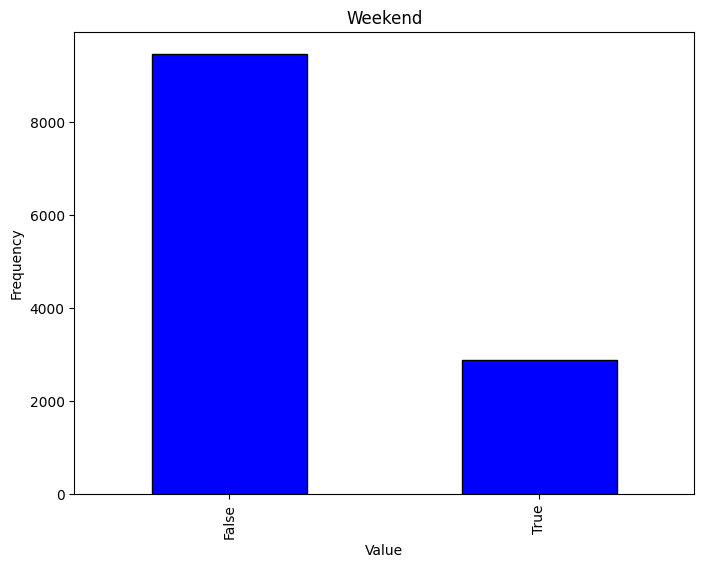

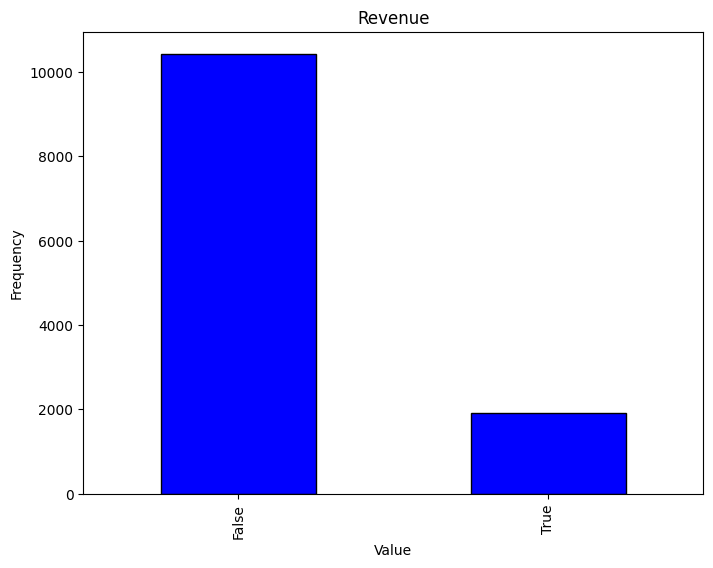

In [4]:
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='blue', edgecolor='black')
    plt.title(f'{column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

                 Attribute  Point-Biserial Correlation        p-value
0           Administrative                    0.138917   3.519760e-54
1            Informational                    0.095200   3.174034e-26
2           ProductRelated                    0.158538   3.241187e-70
3  Administrative_Duration                    0.093587   2.146514e-25
4   Informational_Duration                    0.070345   5.282871e-15
5  ProductRelated_Duration                    0.152373   6.115338e-65
6              BounceRates                   -0.150673   1.594198e-63
7                ExitRates                   -0.207071  1.662654e-119
8               PageValues                    0.492569   0.000000e+00
9               SpecialDay                   -0.082305   5.498934e-20


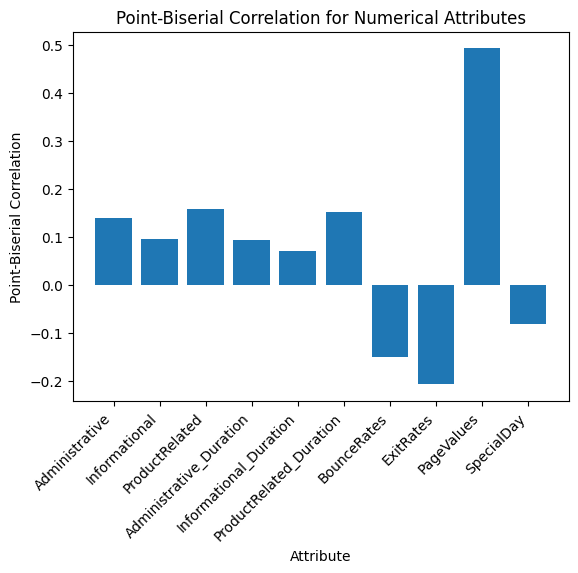

In [5]:
from scipy.stats import pointbiserialr

results = {'Attribute': [], 'Point-Biserial Correlation': [], 'p-value': []}

for column in numeric_columns:
    corr, p_value = pointbiserialr(df['Revenue'], df[column])
    results['Attribute'].append(column)
    results['Point-Biserial Correlation'].append(corr)
    results['p-value'].append(p_value)

results_pbc_df = pd.DataFrame(results)
print(results_pbc_df)

significant_results_pbc = results_pbc_df[results_pbc_df['p-value'] <= 0.05]

plt.bar(significant_results_pbc['Attribute'], significant_results_pbc['Point-Biserial Correlation'])
plt.xlabel('Attribute')
plt.ylabel('Point-Biserial Correlation')
plt.title('Point-Biserial Correlation for Numerical Attributes')
plt.xticks(rotation=45, ha='right')
plt.show()

          Attribute  Chi-squared       p-value
0             Month   384.934762  2.238786e-77
1  OperatingSystems    75.027056  1.416094e-13
2           Browser    27.715299  6.087543e-03
3            Region     9.252751  3.214250e-01
4       TrafficType   373.145565  1.652735e-67
5       VisitorType   135.251923  4.269904e-30
6           Weekend    10.390978  1.266325e-03


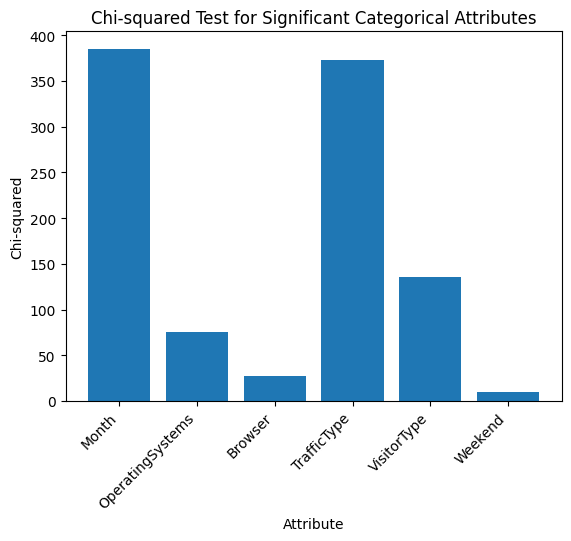

In [6]:
from scipy.stats import chi2_contingency 

results = {'Attribute': [], 'Chi-squared': [], 'p-value': []}

for column in categorical_columns[0:-1]:
    contingency_table = pd.crosstab(df[column], df['Revenue'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    results['Attribute'].append(column)
    results['Chi-squared'].append(chi2_stat)
    results['p-value'].append(p_value)


results_chi2_df = pd.DataFrame(results)
print(results_chi2_df)

significant_results_chi2 = results_chi2_df[results_chi2_df['p-value'] <= 0.05]

plt.bar(significant_results_chi2['Attribute'], significant_results_chi2['Chi-squared'])
plt.xlabel('Attribute')
plt.ylabel('Chi-squared')
plt.title('Chi-squared Test for Significant Categorical Attributes')
plt.xticks(rotation=45, ha='right')
plt.show()

Din cele 2 grafice de mai sus reies clasele care au cel mai mare impact asupra clasei tinta Revenue. Avand aceste informatii putem in principal sa ne folosim de aceste clase la antrenare, reducand astfel dimensiunea problemei. Din atributele numerice le-am ales pe cele mai relevante ca fiind cele care au Point-Biserial Correlation-ul mai mare decat 0.15 in modul. Iar din cele categorice le-am ales pe cele care au Chi-squared-ul mai mare decat 100.

# 3.2

In [7]:
from sklearn.preprocessing import LabelEncoder

new_df = df.copy()

label_encoder = LabelEncoder()
for col in categorical_columns:
    new_df[col] = label_encoder.fit_transform(df[col])

# 3.2.1

### 3.2.1.1

In [8]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

def nll(Y, T):
    nll_value = -np.sum(T * np.log(Y) + (1 - T) * np.log(1 - Y))
    return nll_value

def accuracy(Y, T):
    predictions = []
    for y in Y:
      if y >= 0.5:
        predictions.append(1)
      else:
        predictions.append(0)
    correct_predictions = np.sum(predictions == T)
    total_samples = len(T)
    accuracy_value = correct_predictions / total_samples
    return accuracy_value

In [9]:
def train_logistic(X, T, lr=0.01, epochs_no=100):
    (N, D) = X.shape
    X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
    W = np.random.randn(D + 1)

    for _ in range(epochs_no):
        Y = logistic(X_hat @ W)
        gradient = X_hat.T @ (Y - T)
        W -= lr * gradient

    return W

def predict_logistic(X, W):
    N, D = X.shape
    X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
    Y = logistic(X_hat @ W)

    return Y

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = new_df.drop("Revenue", axis=1).to_numpy()
T = new_df["Revenue"].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42)

W = train_logistic(X_train, T_train, lr=0.001, epochs_no=100)

predictions = predict_logistic(X_test, W)

print(f'Accuracy: {accuracy(predictions, T_test)}')

Accuracy: 0.8722627737226277


In [11]:
significant_attributes_pbc = significant_results_pbc[abs(significant_results_pbc['Point-Biserial Correlation']) > 0.15]['Attribute'].to_numpy()
significant_attributes_chi2 = significant_results_chi2[significant_results_chi2['Chi-squared'] > 100]['Attribute'].to_numpy()

significant_attributes = np.concatenate([significant_attributes_pbc, significant_attributes_chi2])

X = new_df[significant_attributes].to_numpy()
T = new_df["Revenue"].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42)

W = train_logistic(X_train, T_train, lr=0.001, epochs_no=100)

predictions = predict_logistic(X_test, W)

print(f'Accuracy: {accuracy(predictions, T_test)}')

Accuracy: 0.8718572587185726


### 3.2.1.2

In [12]:
from sklearn.linear_model import LogisticRegression

X = new_df.drop("Revenue", axis=1).to_numpy()
T = new_df["Revenue"].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, T_train)

predictions = logistic_regression.predict(X_test)

print(f'Accuracy: {accuracy(predictions, T_test)}')

Accuracy: 0.8690186536901865


In [13]:
significant_attributes_pbc = significant_results_pbc[abs(significant_results_pbc['Point-Biserial Correlation']) > 0.15]['Attribute'].to_numpy()
significant_attributes_chi2 = significant_results_chi2[significant_results_chi2['Chi-squared'] > 100]['Attribute'].to_numpy()

significant_attributes = np.concatenate([significant_attributes_pbc, significant_attributes_chi2])

X = new_df[significant_attributes].to_numpy()
T = new_df["Revenue"].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, T_train)

predictions = logistic_regression.predict(X_test)

print(f'Accuracy: {accuracy(predictions, T_test)}')

Accuracy: 0.8698296836982968


# 3.2.2

### 3.2.2.1

In [14]:
from sklearn.tree import DecisionTreeClassifier

X = new_df.drop("Revenue", axis=1).to_numpy()
T = new_df["Revenue"].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, T_train)

predictions = clf.predict(X_test)

print(f'Accuracy: {accuracy(predictions, T_test)}')

Accuracy: 0.8600973236009732


In [15]:
significant_attributes_pbc = significant_results_pbc[abs(significant_results_pbc['Point-Biserial Correlation']) > 0.15]['Attribute'].to_numpy()
significant_attributes_chi2 = significant_results_chi2[significant_results_chi2['Chi-squared'] > 100]['Attribute'].to_numpy()

significant_attributes = np.concatenate([significant_attributes_pbc, significant_attributes_chi2])

X = new_df[significant_attributes].to_numpy()
T = new_df["Revenue"].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, T_train)

predictions = clf.predict(X_test)

print(f'Accuracy: {accuracy(predictions, T_test)}')

Accuracy: 0.8483373884833739


### 3.2.2.2

In [16]:
from collections import Counter
from math import log2

class Node:
    """ Representation for a node from the decision tree """
    def __init__(self, label):
        """
            For non-leaves, it is the name of the attribute.
            For leaves, it is the class.
        """
        self.label = label

        # Dictionary of (attribute value, nodes)
        self.children = {}

    def display(self, indent=""):
        print(indent + (str(self.label) + ":" if self.children else "<" + str(self.label) + ">"))
        indent += "   "
        if self.children:
            for key, value in self.children.items():
                print(indent + ":" + str(key))
                value.display(indent + "   ")

def mostFrequentClass(X):
    classes = [x['Revenue'] for x in X]
    class_counts = Counter(classes)
    return class_counts.most_common(1)[0][0]

def entropy(X):
    classes = [x['Revenue'] for x in X]
    class_counts = Counter(classes)

    entropy_val = 0
    for count in class_counts.values():
        probability = count / len(X)
        entropy_val -= probability * log2(probability)

    return entropy_val

def gain(X, a):
    total_entropy = entropy(X)
    best_split = None
    best_left_entropy = 1
    best_right_entropy = 1
    sum = 0

    if a in numeric_columns:
        X = sorted(X, key=lambda x: x[a])

        split_points = list(set([(X[i][a] + X[i + 1][a]) / 2 for i in range(len(X) - 1)]))
        for split_point in split_points:
            X_left = [x for x in X if x[a] <= split_point]
            X_right = [x for x in X if x[a] > split_point]

            entropy_left = (len(X_left) / len(X)) * entropy(X_left)
            entropy_right = (len(X_right) / len(X)) * entropy(X_right)

            if entropy_left + entropy_right < best_left_entropy + best_right_entropy and len(X_left) != 0 and len(X_right) != 0:
                best_left_entropy = entropy_left
                best_right_entropy = entropy_right
                best_split = split_point

        sum += best_left_entropy
        sum += best_right_entropy
        
    else:
        for vj in set(x[a] for x in X):
            Xij = [x for x in X if x[a] == vj]
            sum += (len(Xij) / len(X)) * entropy(Xij)

    return (total_entropy - sum, best_split)

def id3(X, A, d=6):
    if len(set(x['Revenue'] for x in X)) == 1:
        return Node(X[0]['Revenue'])

    if not A or d == 0:
        return Node(mostFrequentClass(X))


    gain_tuples = [(a, *gain(X, a)) for a in A]
    max_tuple = max(gain_tuples, key=lambda x: x[1])
    best_attribute, best_split = max_tuple[0], max_tuple[2]
    
    Anew = A.copy()
    Anew.remove(best_attribute)

    root = Node(best_attribute)

    if best_attribute in numeric_columns:
        X = sorted(X, key=lambda x: x[best_attribute])
        X_left = [x for x in X if x[best_attribute] <= best_split]
        X_right = [x for x in X if x[best_attribute] > best_split]

        root.children['<= ' + str(best_split)] = id3(X_left, Anew, d - 1)
        root.children['> ' + str(best_split)] = id3(X_right, Anew, d - 1)
    else:
        for vj in set(x[best_attribute] for x in X):
            Xij = [x for x in X if x[best_attribute] == vj]
            root.children[vj] = id3(Xij, Anew, d - 1)

    return root

def evaluate(tree, example):
    if not tree.children:
        return tree.label
    
    attribute_value = example[tree.label]

    if tree.label in numeric_columns:
        keys = list(tree.children.keys())
        if attribute_value <= float(keys[0][3:]):
            return evaluate(tree.children[keys[0]], example)
        else:
            return evaluate(tree.children[keys[1]], example)
    else:
        if attribute_value in tree.children:
            return evaluate(tree.children[attribute_value], example)
    return None



def precision_tree(tree, X, c):
    prec = 0
    predicted_ct = 0

    for ex in X:
        pred_c = evaluate(tree, ex)
        if pred_c == c:
            predicted_ct += 1
            if ex['Revenue'] ==c:
                prec += 1

    if predicted_ct != 0:
        return prec / predicted_ct
    return 0


def recall_tree(tree, X, c):
    X_c = [x for x in X if x['Revenue'] == c]
    recall = len(list([x for x in X_c if evaluate(tree, x) == c]))
    recall /= len(X_c)
    return recall

def accuracy_tree(tree, X):
    count = len(list(x for x in X if evaluate(tree, x) == x['Revenue']))
    return 1.0 * count / len(X)

def f1_score_tree(tree, X, c):
    precision = precision_tree(tree, X, c)
    recall = recall_tree(tree, X, c)

    if precision + recall != 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
        return f1_score
    return 0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = new_df.drop("Revenue", axis=1).to_numpy()
T = new_df["Revenue"].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42)

df_attributes = list(new_df.drop('Revenue', axis=1).columns)

X_train_df = pd.DataFrame(X_train, columns=new_df.drop('Revenue', axis=1).columns)
X_test_df = pd.DataFrame(X_test, columns=new_df.drop('Revenue', axis=1).columns)

X_train_df['Revenue'] = T_train
X_test_df['Revenue'] = T_test

df_train_dict = X_train_df.to_dict('records')
df_test_dict = X_test_df.to_dict('records')

tree = id3(df_train_dict, df_attributes, 3)
tree.display()

print(f'Accuracy: {accuracy_tree(tree, df_test_dict)}')

PageValues:
   :<= -0.27902795969266814
      Month:
         :-0.06919119132147004
            <0>
         :0.7746539016495759
            ProductRelated_Duration:
               :<= -0.018908798710177237
                  <0>
               :> -0.018908798710177237
                  <0>
         :-0.491113737806993
            TrafficType:
               :-0.5141821926314181
                  <0>
               :-0.265735353727688
                  <0>
               :2.2187330353096133
                  <0>
               :-0.01728851482395788
                  <0>
               :-0.7626290315351482
                  <0>
               :0.23115832407977221
                  <0>
               :2.7156267131170733
                  <0>
               :1.7218393575021527
                  <0>
               :3.9578609076357236
                  <0>
               :0.4796051629835023
                  <0>
               :2.9640735520208032
                  <1>
         :0.35273135516

In [18]:
significant_attributes_pbc = significant_results_pbc[abs(significant_results_pbc['Point-Biserial Correlation']) > 0.15]['Attribute'].to_numpy()
significant_attributes_chi2 = significant_results_chi2[significant_results_chi2['Chi-squared'] > 100]['Attribute'].to_numpy()

significant_attributes = np.concatenate([significant_attributes_pbc, significant_attributes_chi2])
df_attributes = list(significant_attributes)

X = new_df[significant_attributes].copy()
T = new_df["Revenue"].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42)

X_train_df = pd.DataFrame(X_train, columns=significant_attributes)
X_test_df = pd.DataFrame(X_test, columns=significant_attributes)

X_train_df['Revenue'] = T_train
X_test_df['Revenue'] = T_test

df_train_dict = X_train_df.to_dict('records')
df_test_dict = X_test_df.to_dict('records')

tree = id3(df_train_dict, df_attributes, 3)
tree.display()

print(f'Accuracy: {accuracy_tree(tree, df_test_dict)}')

PageValues:
   :<= -0.27902795969266814
      Month:
         :-0.06919119132147004
            <0>
         :0.7746539016495759
            ProductRelated_Duration:
               :<= -0.018908798710177237
                  <0>
               :> -0.018908798710177237
                  <0>
         :-0.491113737806993
            TrafficType:
               :-0.5141821926314181
                  <0>
               :-0.265735353727688
                  <0>
               :2.2187330353096133
                  <0>
               :-0.01728851482395788
                  <0>
               :-0.7626290315351482
                  <0>
               :0.23115832407977221
                  <0>
               :2.7156267131170733
                  <0>
               :1.7218393575021527
                  <0>
               :3.9578609076357236
                  <0>
               :0.4796051629835023
                  <0>
               :2.9640735520208032
                  <1>
         :0.35273135516

# 3.2.3

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import precision_score, recall_score, f1_score

significant_attributes_pbc = significant_results_pbc[abs(significant_results_pbc['Point-Biserial Correlation']) > 0.15]['Attribute'].to_numpy()
significant_attributes_chi2 = significant_results_chi2[significant_results_chi2['Chi-squared'] > 100]['Attribute'].to_numpy()

significant_attributes = np.concatenate([significant_attributes_pbc, significant_attributes_chi2])

X = new_df[significant_attributes].to_numpy()
T = new_df["Revenue"].to_numpy()

results_list = []

for i in range(10):
    print(f'\nSplit {i + 1}')
    X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2)
    print(f'1. Logistic Regression:')
    for scaler in [StandardScaler(), MinMaxScaler(), RobustScaler()]:
        print(f'- Scaler: {scaler.__class__.__name__}')
        if scaler is not None:
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
        
        logistic_regression = LogisticRegression()
        logistic_regression.fit(X_train, T_train)

        predictions = logistic_regression.predict(X_test)

        precision = precision_score(T_test, predictions, pos_label=1)
        recall = recall_score(T_test, predictions, pos_label=1)
        f1 = f1_score(T_test, predictions, pos_label=1)

        print(f'Precision scikit: {precision}')
        print(f'Recall scikit: {recall}')
        print(f'F1 scikit: {f1}')

        results_list.append({
                'Algorithm': f'Logistic Regression Scikit',
                'Scaler': scaler.__class__.__name__,
                'Tree Depth': 'N/A',
                'Precision': precision,
                'Recall': recall,
                'F1': f1
            })

        W = train_logistic(X_train, T_train, lr=0.001, epochs_no=100)

        Y = predict_logistic(X_test, W)
        predictions = []
        for y in Y:
            if y >= 0.5:
                predictions.append(1)
            else:
                predictions.append(0)

        precision = precision_score(T_test, predictions, pos_label=1)
        recall = recall_score(T_test, predictions, pos_label=1)
        f1 = f1_score(T_test, predictions, pos_label=1)

        print(f'Precision manual: {precision}')
        print(f'Recall manual: {recall}')
        print(f'F1 manual: {f1}')

        results_list.append({
                'Algorithm': f'Logistic Regression Manual',
                'Scaler': scaler.__class__.__name__,
                'Tree Depth': 'N/A',
                'Precision': precision,
                'Recall': recall,
                'F1': f1
            })

    print(f'2. Decision Tree:')
    for scaler in [None, StandardScaler(), MinMaxScaler(), RobustScaler()]:
        print(f'- Scaler: {scaler.__class__.__name__}')
        for tree_depth in [3, 4, 5, 6]:
            print(f'-- Tree depth: {tree_depth}')
            if scaler is not None:
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)
            
            clf = DecisionTreeClassifier(max_depth=tree_depth)
            clf.fit(X_train, T_train)

            predictions = clf.predict(X_test)

            precision = precision_score(T_test, predictions, pos_label=1)
            recall = recall_score(T_test, predictions, pos_label=1)
            f1 = f1_score(T_test, predictions, pos_label=1)
            
            print(f'Precision scikit: {precision}')
            print(f'Recall scikit: {recall}')
            print(f'F1 scikit: {f1}')

            results_list.append({
                    'Algorithm': f'Decision Tree Scikit',
                    'Scaler': scaler.__class__.__name__,
                    'Tree Depth': tree_depth,
                    'Precision': precision,
                    'Recall': recall,
                    'F1': f1
                })

            X_train_df = pd.DataFrame(X_train, columns=significant_attributes)
            X_test_df = pd.DataFrame(X_test, columns=significant_attributes)

            X_train_df['Revenue'] = T_train
            X_test_df['Revenue'] = T_test

            df_train_dict = X_train_df.to_dict('records')
            df_test_dict = X_test_df.to_dict('records')

            tree = id3(df_train_dict, df_attributes, tree_depth)

            precision = precision_tree(tree, df_test_dict, 1)
            recall = recall_tree(tree, df_test_dict, 1)
            f1 = f1_score_tree(tree, df_test_dict, 1)

            print(f'Precision manual: {precision}')
            print(f'Recall manual: {recall}')
            print(f'F1 manual: {f1}')

            results_list.append({
                    'Algorithm': f'Decision Tree Manual',
                    'Scaler': scaler.__class__.__name__,
                    'Tree Depth': tree_depth,
                    'Precision': precision,
                    'Recall': recall,
                    'F1': f1
                })


Split 1
1. Logistic Regression:
- Scaler: StandardScaler
Precision scikit: 0.7872340425531915
Recall scikit: 0.37092731829573933
F1 scikit: 0.504258943781942
Precision manual: 0.6509090909090909
Recall manual: 0.44862155388471175
F1 manual: 0.5311572700296735
- Scaler: MinMaxScaler
Precision scikit: 0.8208955223880597
Recall scikit: 0.2756892230576441
F1 scikit: 0.41275797373358347
Precision manual: 0.7577639751552795
Recall manual: 0.3057644110275689
F1 manual: 0.43571428571428567
- Scaler: RobustScaler
Precision scikit: 0.8175182481751825
Recall scikit: 0.2807017543859649
F1 scikit: 0.41791044776119407
Precision manual: 0.6666666666666666
Recall manual: 0.03508771929824561
F1 manual: 0.06666666666666667
2. Decision Tree:
- Scaler: NoneType
-- Tree depth: 3
Precision scikit: 0.654320987654321
Recall scikit: 0.6641604010025063
F1 scikit: 0.6592039800995025
Precision manual: 0.6950904392764858
Recall manual: 0.6741854636591479
F1 manual: 0.6844783715012723
-- Tree depth: 4
Precision sc

In [20]:
results_df = pd.DataFrame(results_list)

summary_df = results_df.groupby(['Algorithm', 'Scaler', 'Tree Depth']).agg({
    'Precision': ['mean', 'std'],
    'Recall': ['mean', 'std'],
    'F1': ['mean', 'std']
}).reset_index()

display(summary_df)

Algorithm          Scaler Tree Depth Precision            \
                                                               mean       std   
0         Decision Tree Manual    MinMaxScaler          3  0.676914  0.020230   
1         Decision Tree Manual    MinMaxScaler          4  0.694239  0.050443   
2         Decision Tree Manual    MinMaxScaler          5  0.660432  0.030272   
3         Decision Tree Manual    MinMaxScaler          6  0.637145  0.021404   
4         Decision Tree Manual        NoneType          3  0.676914  0.020230   
5         Decision Tree Manual        NoneType          4  0.694394  0.050179   
6         Decision Tree Manual        NoneType          5  0.660533  0.030289   
7         Decision Tree Manual        NoneType          6  0.638362  0.021193   
8         Decision Tree Manual    RobustScaler          3  0.676914  0.020230   
9         Decision Tree Manual    RobustScaler          4  0.694394  0.050179   
10        Decision Tree Manual    RobustScaler          5  0.660533  0.030289   
11        Decision Tree Manual    RobustScaler          6  0.638030  0.020916   
12        Decision Tree Manual  StandardScaler          3  0.676914  0.020230   
13        Decision Tree Manual  StandardScaler          4  0.694226  0.050362   
14        Decision Tree Manual  StandardScaler          5  0.659975  0.030342   
15        Decision Tree Manual  StandardScaler          6  0.638135  0.021595   
16        Decision Tree Scikit    MinMaxScaler          3  0.667976  0.026242   
17        Decision Tree Scikit    MinMaxScaler          4  0.707951  0.033586   
18        Decision Tree Scikit    MinMaxScaler          5  0.721771  0.032630   
19        Decision Tree Scikit    MinMaxScaler          6  0.714688  0.030505   
20        Decision Tree Scikit        NoneType          3  0.667976  0.026242   
21        Decision Tree Scikit        NoneType          4  0.707951  0.033586   
22        Decision Tree Scikit        NoneType          5  0.721771  0.032630   
23        Decision Tree Scikit        NoneType          6  0.715056  0.030979   
24        Decision Tree Scikit    RobustScaler          3  0.667976  0.026242   
25        Decision Tree Scikit    RobustScaler          4  0.707951  0.033586   
26        Decision Tree Scikit    RobustScaler          5  0.721945  0.032889   
27        Decision Tree Scikit    RobustScaler          6  0.713867  0.030057   
28        Decision Tree Scikit  StandardScaler          3  0.667976  0.026242   
29        Decision Tree Scikit  StandardScaler          4  0.707951  0.033586   
30        Decision Tree Scikit  StandardScaler          5  0.721771  0.032630   
31        Decision Tree Scikit  StandardScaler          6  0.713289  0.030132   
32  Logistic Regression Manual    MinMaxScaler        N/A  0.821695  0.088875   
33  Logistic Regression Manual    RobustScaler        N/A  0.589263  0.184820   
34  Logistic Regression Manual  StandardScaler        N/A  0.718309  0.069714   
35  Logistic Regression Scikit    MinMaxScaler        N/A  0.789644  0.037615   
36  Logistic Regression Scikit    RobustScaler        N/A  0.779891  0.039594   
37  Logistic Regression Scikit  StandardScaler        N/A  0.763338  0.031938   

      Recall                  F1            
        mean       std      mean       std  
0   0.656356  0.025210  0.666287  0.019903  
1   0.575603  0.061070  0.625234  0.022512  
2   0.580930  0.041333  0.616689  0.019114  
3   0.563388  0.036918  0.596807  0.015600  
4   0.656356  0.025210  0.666287  0.019903  
5   0.575603  0.061070  0.625317  0.022577  
6   0.581180  0.041048  0.616890  0.019048  
7   0.563648  0.037006  0.597491  0.015682  
8   0.656356  0.025210  0.666287  0.019903  
9   0.575603  0.061070  0.625317  0.022577  
10  0.581180  0.041048  0.616890  0.019048  
11  0.563380  0.036891  0.597213  0.015766  
12  0.656356  0.025210  0.666287  0.019903  
13  0.575603  0.061070  0.625234  0.022511  
14  0.581180  0.041048  0.616639  0.018952  
15  0.563917  0

In [21]:
import pandas as pd

results_df = pd.DataFrame(results_list)
algorithm_configs = results_df[['Algorithm', 'Scaler', 'Tree Depth']].drop_duplicates()
summary_dicts = []

for _, config in algorithm_configs.iterrows():
    algorithm_mask = (results_df['Algorithm'] == config['Algorithm']) & (results_df['Scaler'] == config['Scaler']) & (results_df['Tree Depth'] == config['Tree Depth'])
    
    mean_precision = results_df.loc[algorithm_mask, 'Precision'].mean()
    std_precision = results_df.loc[algorithm_mask, 'Precision'].std()
    
    mean_recall = results_df.loc[algorithm_mask, 'Recall'].mean()
    std_recall = results_df.loc[algorithm_mask, 'Recall'].std()
    
    mean_f1 = results_df.loc[algorithm_mask, 'F1'].mean()
    std_f1 = results_df.loc[algorithm_mask, 'F1'].std()
    
    summary_dicts.append({
        'Algorithm': config['Algorithm'],
        'Scaler': config['Scaler'],
        'Tree Depth': config['Tree Depth'],
        'Precision_mean': mean_precision,
        'Precision_std': std_precision,
        'Recall_mean': mean_recall,
        'Recall_std': std_recall,
        'F1_mean': mean_f1,
        'F1_std': std_f1
    })

summary_df = pd.DataFrame(summary_dicts)
max_f1_rows = summary_df.loc[summary_df.groupby('Algorithm')['F1_mean'].idxmax()]

def highlight_max_f1(s):
    is_max = s.index.isin(max_f1_rows.index)
    return ['font-weight: bold' if v else '' for v in is_max]

styled_df = summary_df.style.apply(highlight_max_f1)

display(styled_df)

,Algorithm,Scaler,Tree Depth,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,Logistic Regression Scikit,StandardScaler,N/A,0.763338,0.031938,0.363129,0.014849,0.491730,0.013541
1,Logistic Regression Manual,StandardScaler,N/A,0.718309,0.069714,0.393971,0.062301,0.502439,0.037341
2,Logistic Regression Scikit,MinMaxScaler,N/A,0.789644,0.037615,0.269228,0.015018,0.401288,0.018528
3,Logistic Regression Manual,MinMaxScaler,N/A,0.821695,0.088875,0.101309,0.130851,0.153132,0.183031
4,Logistic Regression Scikit,RobustScaler,N/A,0.779891,0.039594,0.272614,0.013661,0.403797,0.017762
5,Logistic Regression Manual,RobustScaler,N/A,0.589263,0.184820,0.087134,0.099031,0.118834,0.088603
6,Decision Tree Scikit,NoneType,3,0.667976,0.026242,0.627072,0.057482,0.644748,0.031268
7,Decision Tree Manual,NoneType,3,0.676914,0.020230,0.656356,0.025210,0.666287,0.019903
8,Decision Tree Scikit,NoneType,4,0.707951,0.033586,0.599342,0.052310,0.646758,0.020559
9,Decision Tree Manual,NoneType,4,0.694394,0.050179,0.575603,0.061070,0.625317,0.022577


Se observa din tabel ca StandardScaler-ul a avut cele mai bune performante cand vine vorba de scorul F1 pentru logistic regression. Observam la decision tree ca implementarea manuala are acelasi scor F1 pentru orice scaler, la aceeasi adancime, in timp ce implementare cu sciket pare sa dea cel mai bun rezultat cu Robust Scaler si adancime 5.

Din tabel reiese ca cea mai buna configuratie, raportat la scorul F1, ar fi Decision Tree Manual cu adancime 3 orice scaler. Este cea mai buna din acest punct de vedere, probabil din cauza faptului ca s-a mapat cel mai bine pe problema data, indiferent de scaler, mai ales ca algoritmul pare sa aleaga atributele cele mai relevante pentru construirea arborelui, chiar daca nu le reduc dimensionalitatea cu ajutorul corelarii.